# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [58]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/User/Desktop/4th-ML100Days/Data'

### 之前做過的處理

In [41]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape  # 資料筆數 307511、資料欄位 122

(307511, 122)

In [4]:
# data = app_train.head() ;print(data)
# NAME_CONTRACT_TYPE = app_train['NAME_CONTRACT_TYPE'].head();print(NAME_CONTRACT_TYPE)

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0 

In [ ]:
## 找出 'NAME_CONTRACT_TYPE' 有幾個值
app_train['NAME_CONTRACT_TYPE'].unique()

In [ ]:
## 存成 List
list(app_train['NAME_CONTRACT_TYPE'].unique())

In [ ]:
## 判斷長度
len(list(app_train['NAME_CONTRACT_TYPE'].unique()))

In [ ]:
data['NAME_CONTRACT_TYPE']

In [ ]:
# 把 data['NAME_CONTRACT_TYPE'] 之中的變數  "Cash loans" 轉成 0  "Revolving loans" 轉成 1
le_fit_transform = le.fit_transform(data['NAME_CONTRACT_TYPE']);le_fit_transform

In [42]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder   # 只載入 LabelEncoder 函數
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':              # 資料型態是 object
        if len(list(app_train[col].unique())) <= 2:   # 如果只有兩種值的類別型欄位
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243;app_train['DAYS_EMPLOYED_ANOM']

In [43]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄
## 針對 "DAYS_EMPLOYED" 判斷數值是否 365243
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH'] / 365 

In [44]:
pd.value_counts(app_train['DAYS_BIRTH'])

37.668493    43
36.934247    42
49.994521    41
27.452055    41
28.197260    40
43.208219    40
39.438356    39
39.087671    39
31.956164    39
36.336986    39
40.523288    38
41.210959    38
37.216438    38
37.353425    38
37.775342    38
42.643836    38
36.931507    38
38.057534    38
40.794521    37
35.084932    37
40.520548    37
27.923288    37
27.769863    37
36.210959    37
39.112329    37
30.432877    37
54.997260    37
42.638356    37
27.690411    37
40.457534    37
             ..
68.273973     1
68.419178     1
68.849315     1
21.736986     1
68.539726     1
68.706849     1
68.156164     1
68.975342     1
68.939726     1
68.616438     1
68.726027     1
67.356164     1
68.213699     1
68.109589     1
65.358904     1
69.016438     1
21.909589     1
68.841096     1
66.443836     1
68.164384     1
68.789041     1
68.764384     1
21.619178     1
68.624658     1
66.939726     1
68.416438     1
68.942466     1
21.408219     1
68.808219     1
68.580822     1
Name: DAYS_BIRTH, Length

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [46]:
## "DAYS_BIRTH" 轉成 整數
DD = pd.DataFrame(app_train['DAYS_BIRTH'],dtype=np.int) # app_train['DAYS_BIRTH']

In [49]:
DD["DAYS_BIRTH_10"] = pd.qcut(DD["DAYS_BIRTH"], 10)

In [51]:
DD["DAYS_BIRTH_10"]  = pd.cut(DD["DAYS_BIRTH"], [0,10,20,30,40,50,60,70,80,90,100])

In [56]:
DAYS_BIRTH_10 = pd.DataFrame(pd.value_counts(DD["DAYS_BIRTH_10"]))

In [57]:
DAYS_BIRTH_10

,DAYS_BIRTH_10
"(30, 40]",83117
"(40, 50]",74401
"(50, 60]",67819
"(20, 30]",52805
"(60, 70]",29368
"(10, 20]",1
"(90, 100]",0
"(80, 90]",0
"(70, 80]",0
"(0, 10]",0


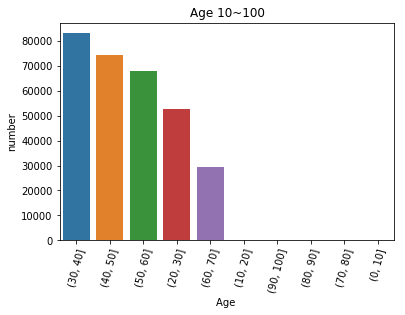

In [66]:
px = DAYS_BIRTH_10.index.astype(str)
py = DAYS_BIRTH_10['DAYS_BIRTH_10']
sns.barplot(px, py)

plt.xticks(rotation = 75); plt.xlabel("Age "); plt.ylabel("number")
plt.title('Age 10~100' );